<a href="https://colab.research.google.com/github/kipruto45/LOAN-PREDICTION-MODEL/blob/main/loan_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

Reading data

In [ ]:
train = pd.read_csv(r"C:\Users\user\Downloads\train.csv")
test = pd.read_csv(r"C:\Users\user\Downloads\test.csv")

Making a copy of the file

In [ ]:
train_original=train.copy()
test_original=test.copy()

Understtanding the Data

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Shape of the dataset

In [ ]:
train.shape, test.shape

((614, 13), (367, 12))

#print data tyypes for each variable

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

Univariable Analysis

<Axes: xlabel='Loan_Status'>

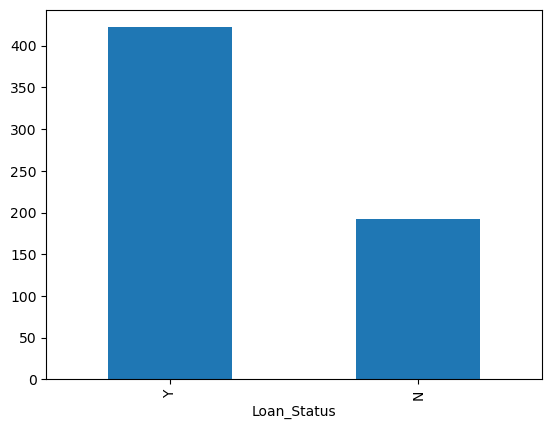

In [ ]:
train['Loan_Status'].value_counts().plot.bar()

Independent Variable:

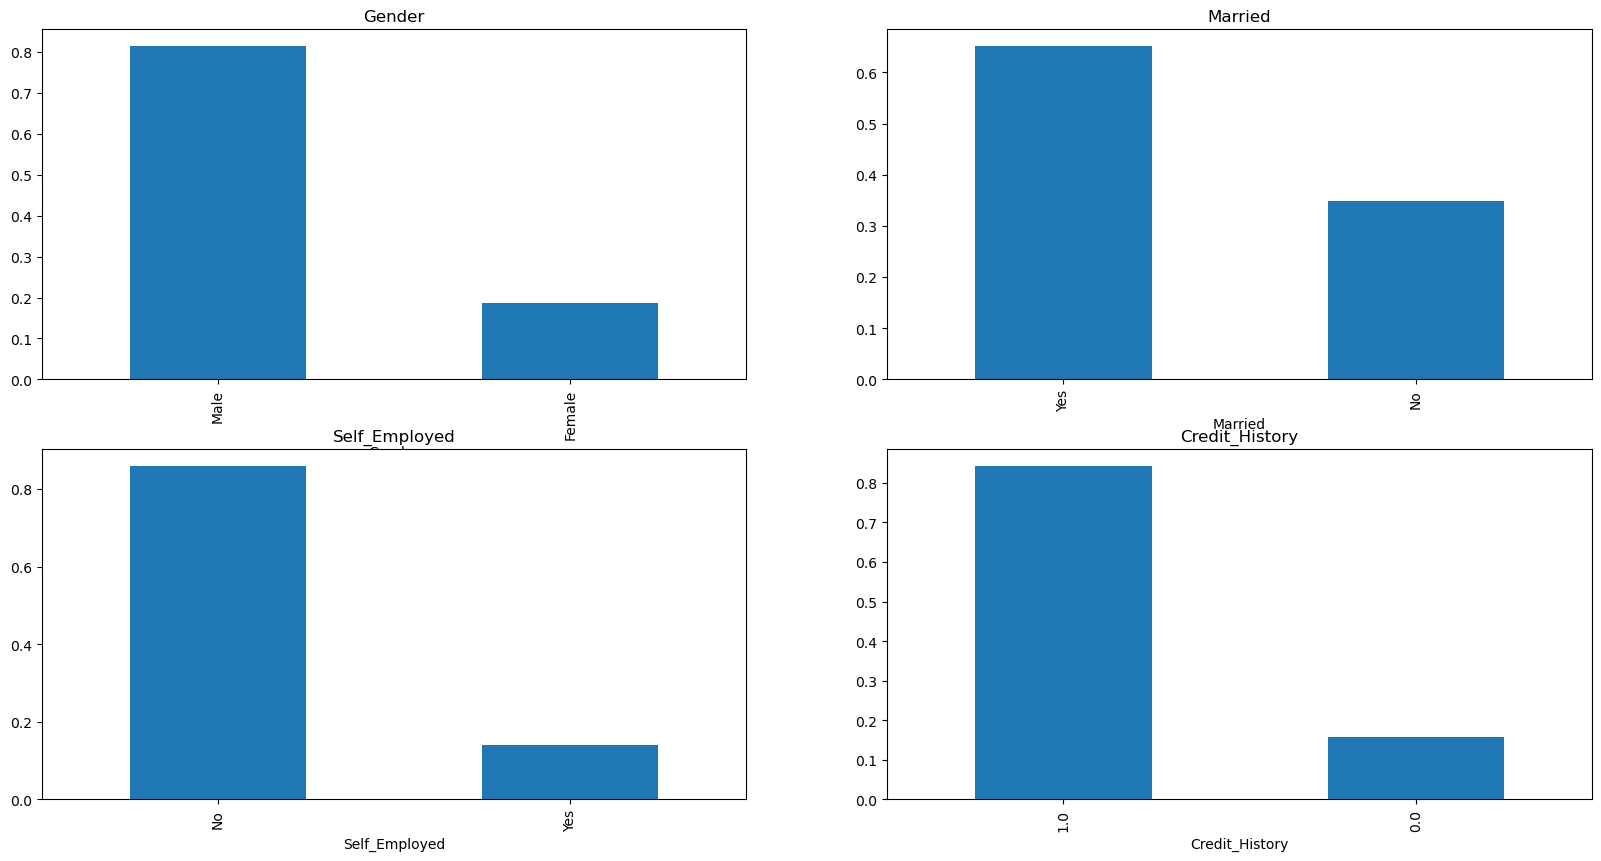

In [ ]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

Independent Variable:(original)

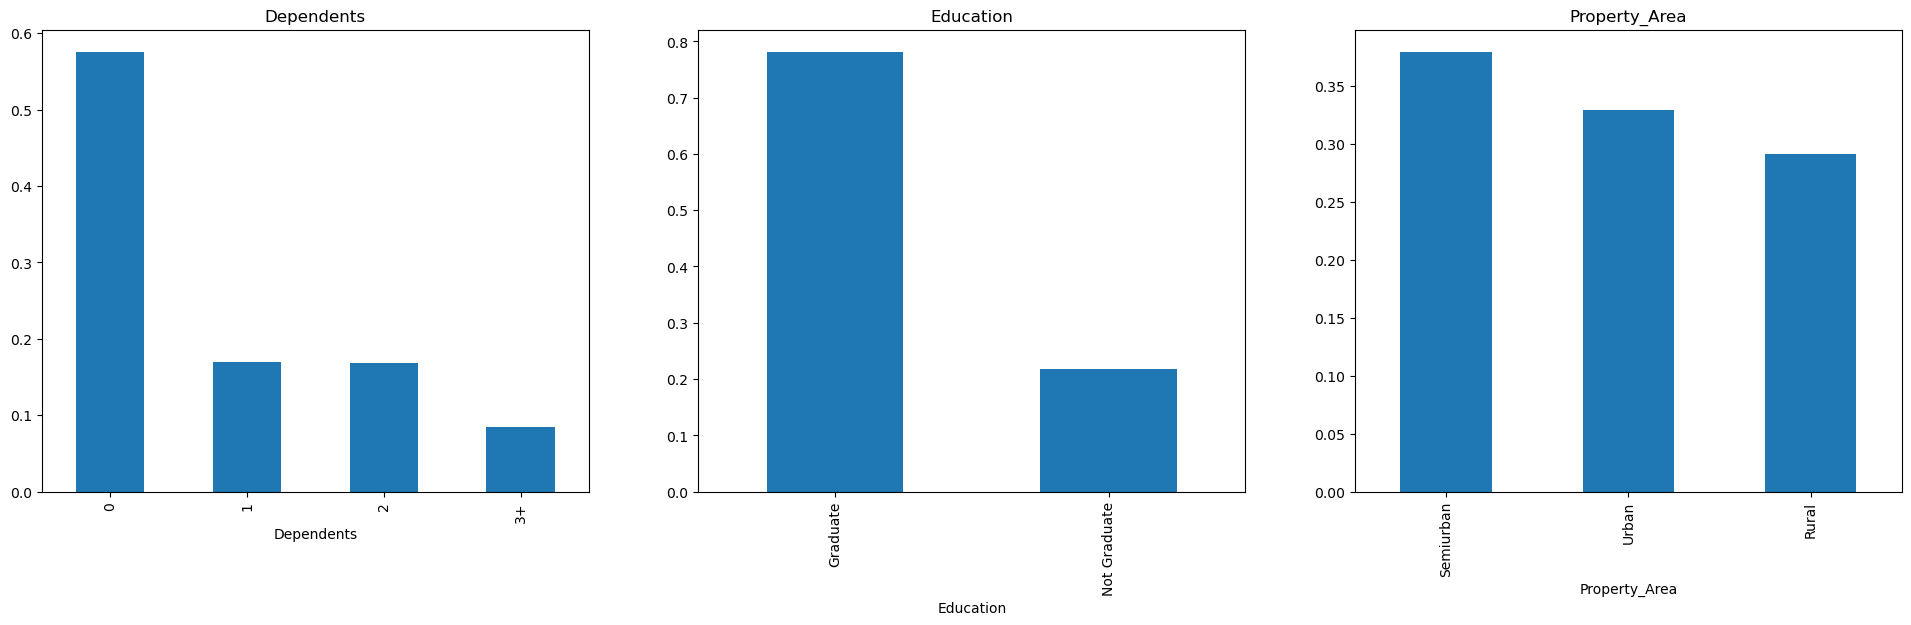

In [ ]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

Independent Variable:Numerical

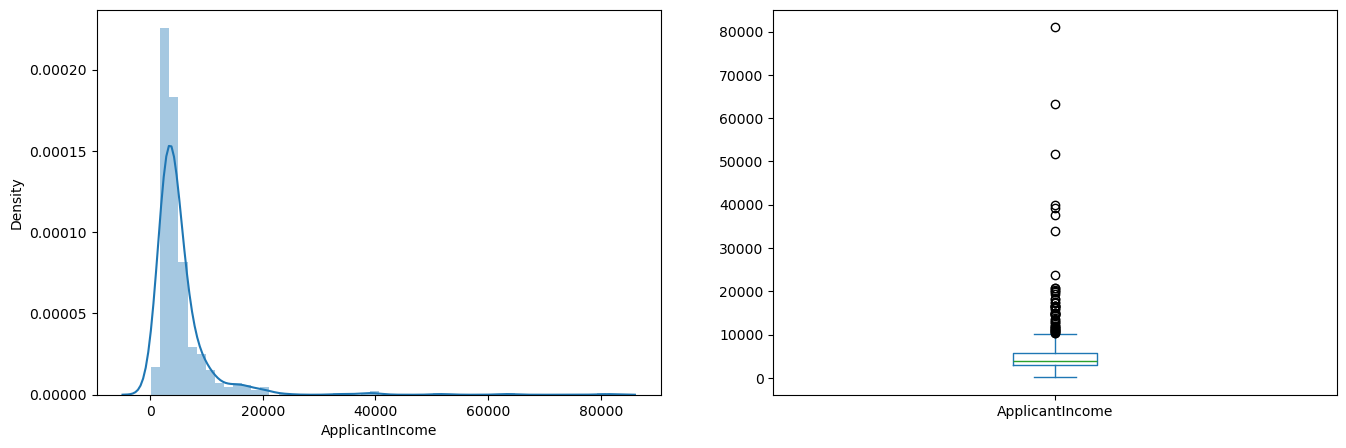

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

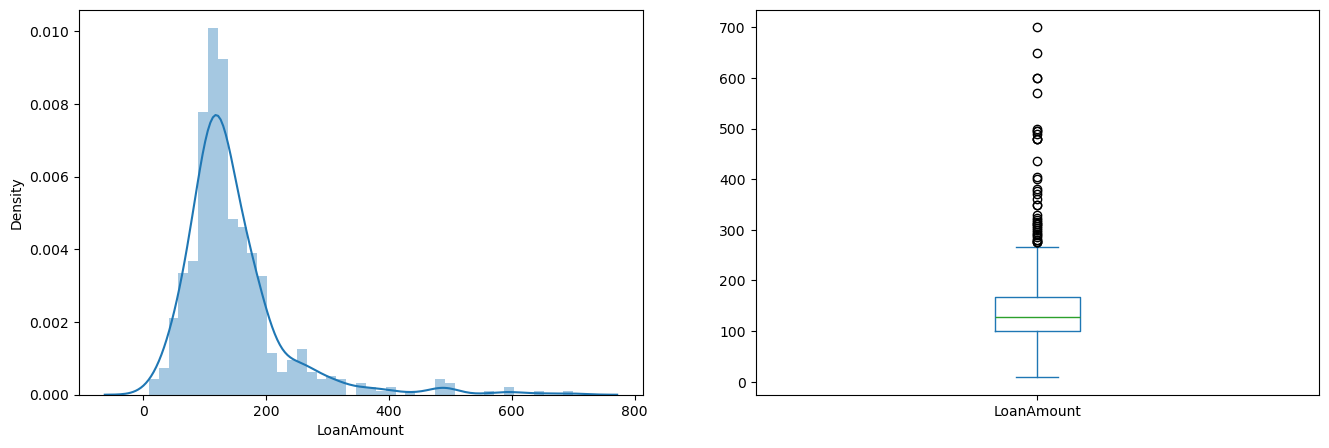

In [ ]:
#Distribution of Loan Amount
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()


Bivariate Analysis

<Axes: xlabel='Gender'>

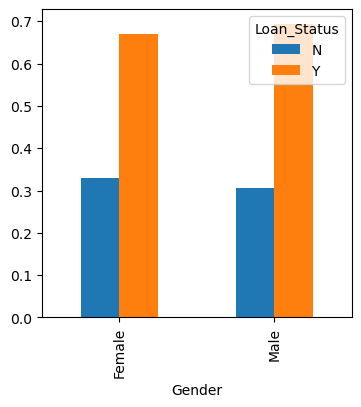

In [ ]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

Visualizing Remaining variables

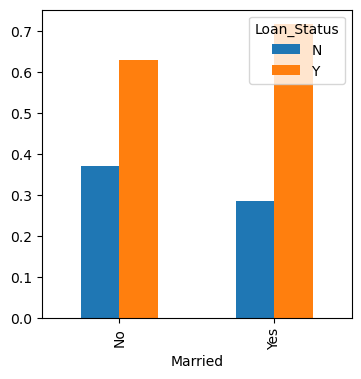

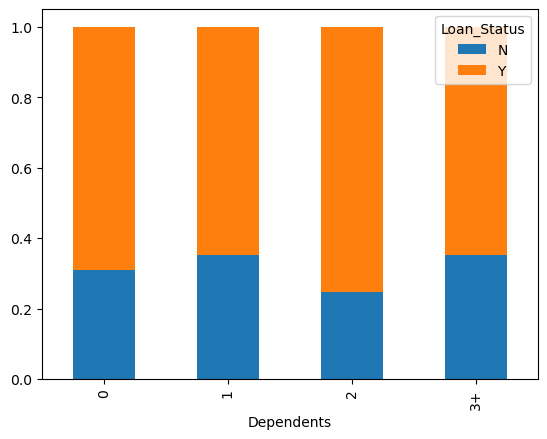

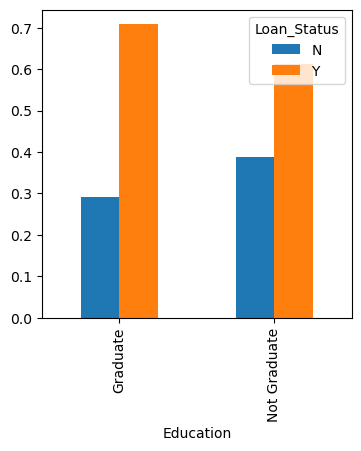

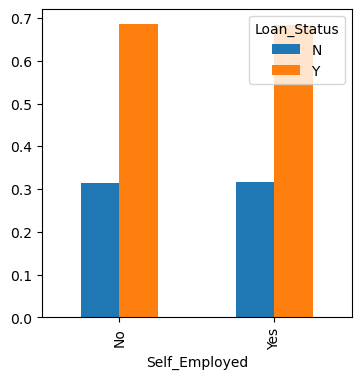

In [ ]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

Relationship between variable and loan status

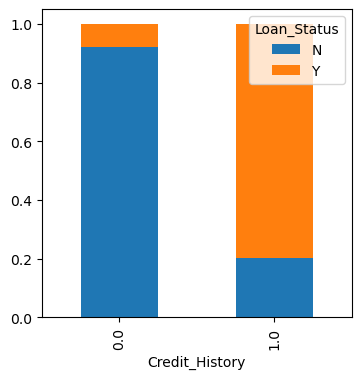

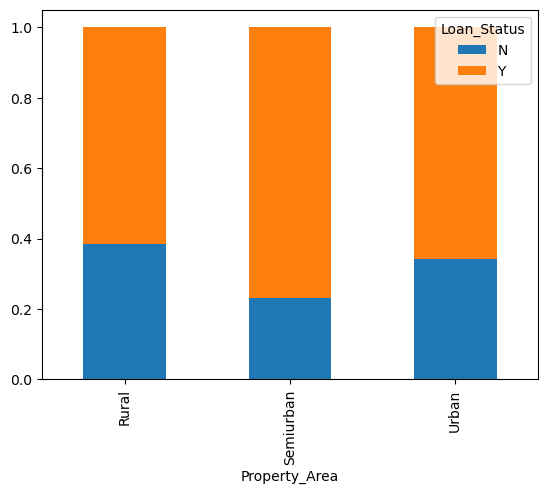

In [ ]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Numerical Independent Variables vs Targeted Variable

<Axes: xlabel='Loan_Status'>

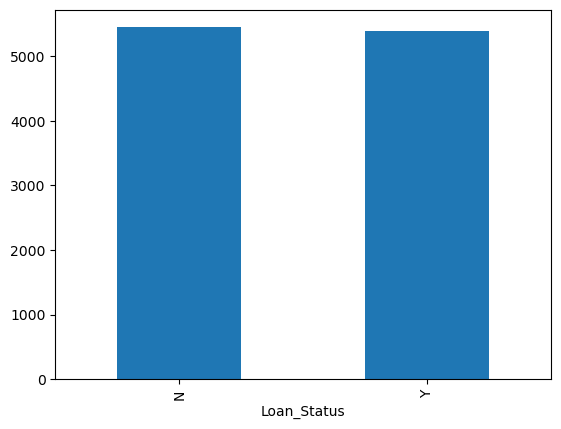

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Analysis of corresponding Loan Status

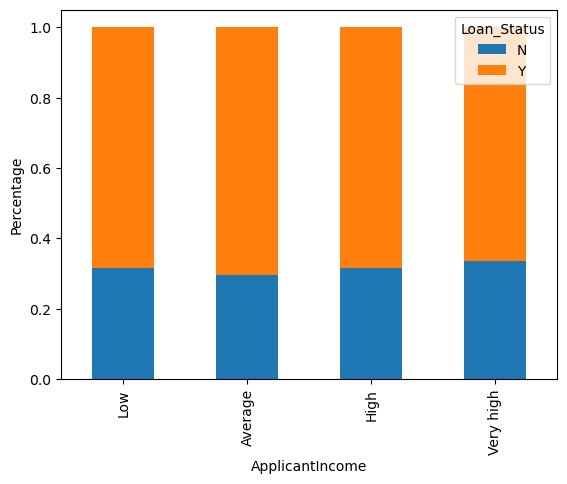

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

Analysis of income and Loan amount

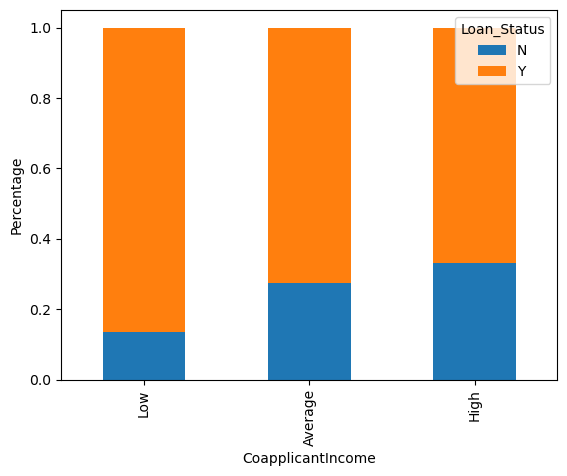

In [ ]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

Combining Income and Coapplicant_Income of total Income

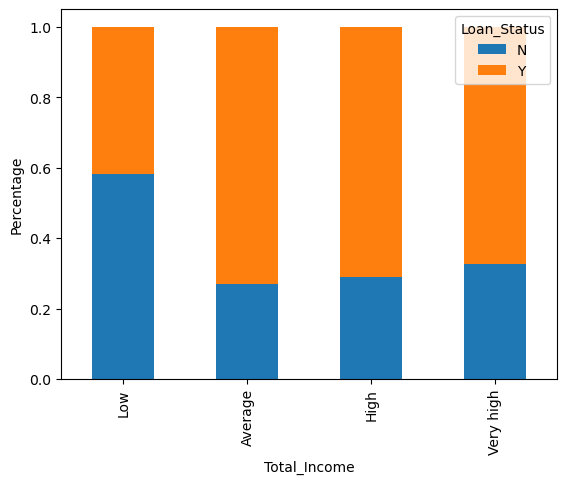

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

Visualization of Loan Amount VAriable

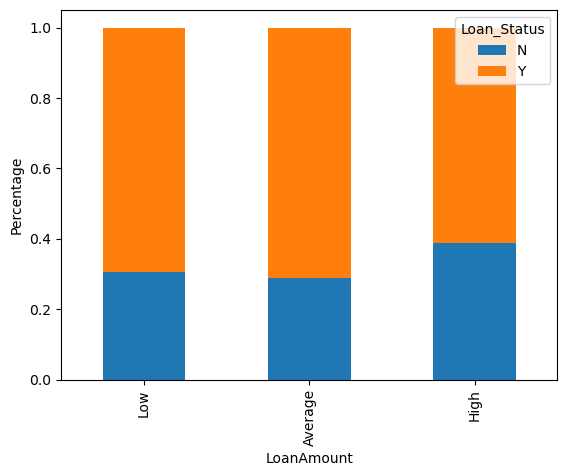

In [ ]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [ ]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin',
 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

Correlation between all numerical variables

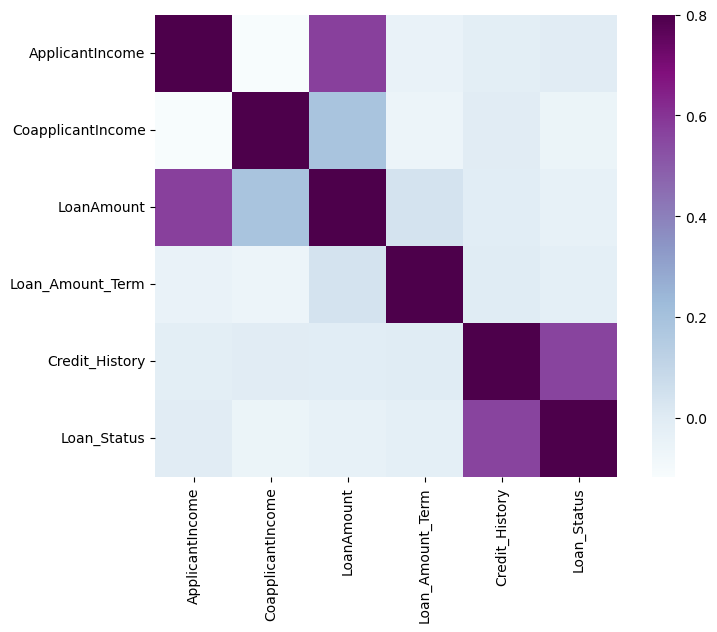

In [ ]:
matrix = train.select_dtypes(include=['float64', 'int64']).corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

Missing Value Imutation

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Filling in Missing Values

In [ ]:
train['Loan_Amount_Term'].value_counts()


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Checking for missing values

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Filling missing values in the data set

In [ ]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Outer Treatement:Visualizing log transformation

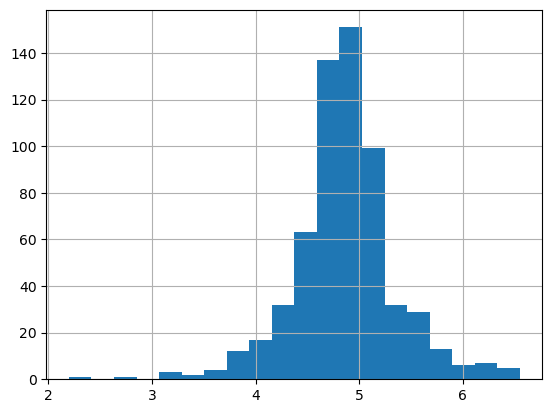

In [ ]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Evaluating Metrics for Classification

In [ ]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [ ]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

In [ ]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Importting skllearn


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

Importing LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

Predicting Loan_Status

In [ ]:
pred_cv = model.predict(x_cv)

Calculating Accuracy

In [ ]:
accuracy_score(y_cv,pred_cv)

0.7675675675675676

Accuracy of our prediction is 0.8054054054054054

Prediction for datasets

In [ ]:
pred_test = model.predict(test)

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

Importing StratifiedFold

In [ ]:
from sklearn.model_selection import StratifiedKFold

MAking cross-validation

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1

pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]

n1 of kfold 5
accuracy_score 0.8048780487804879
n2 of kfold 5
accuracy_score 0.8373983739837398
n3 of kfold 5
accuracy_score 0.7804878048780488
n4 of kfold 5
accuracy_score 0.7886178861788617
n5 of kfold 5
accuracy_score 0.7950819672131147


Mean validation accuracy is 0.84375

VISUALIZING CURVE

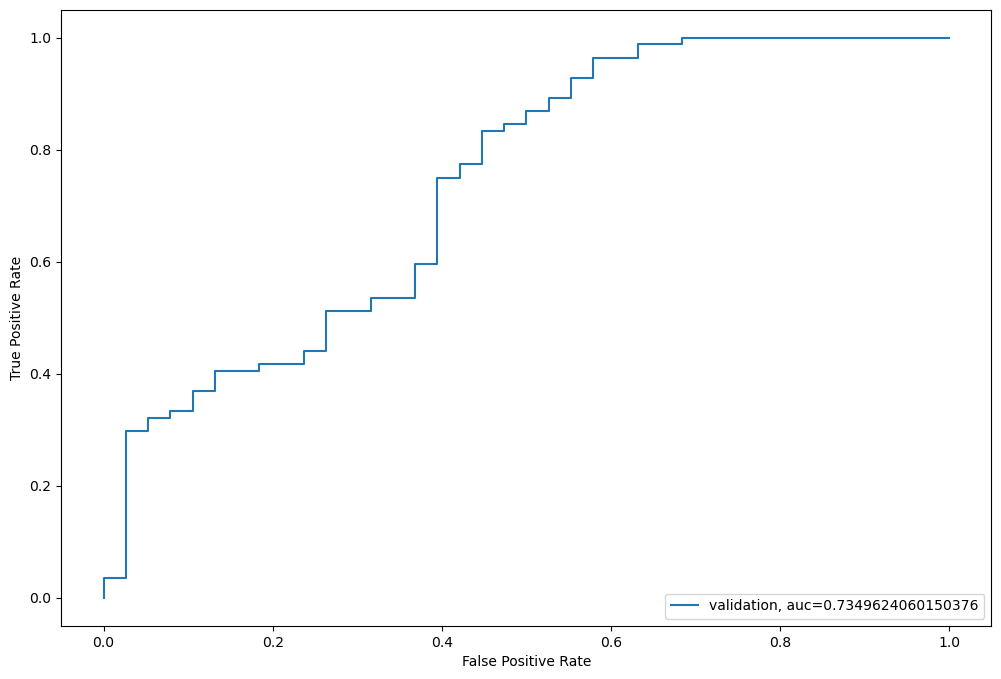

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
import pandas as pd

submission = pd.DataFrame()
submission['Loan_Status'] = pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

Converting submission to csvformat

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

Checking distribution of Total income

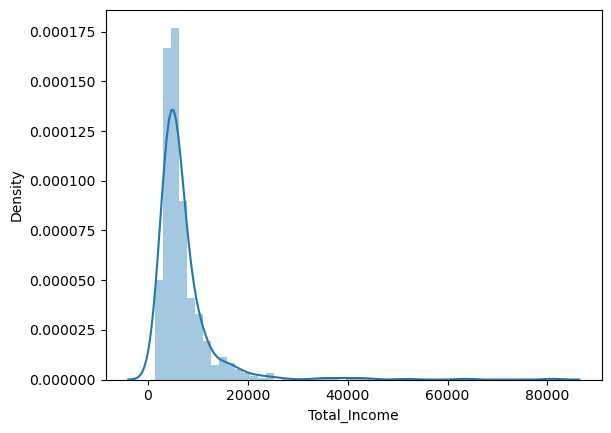

In [ ]:
import seaborn as sns

sns.distplot(train['Total_Income']);

Log transformation to amke distribution normal

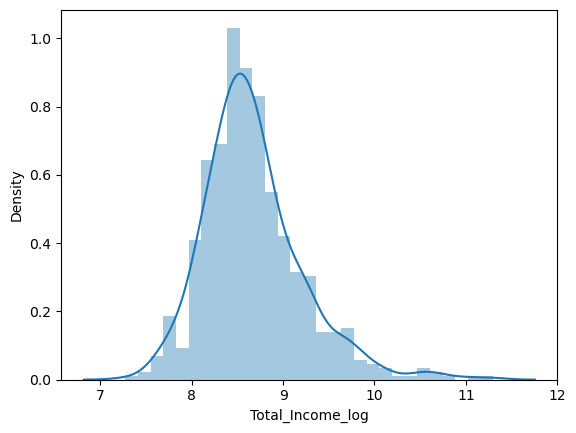

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

Creating EMI variable

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

Checking distribution

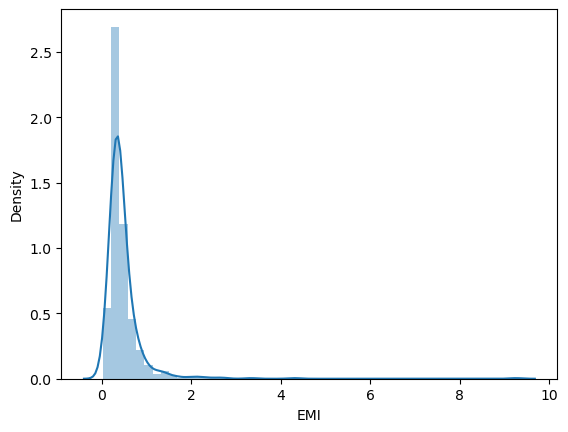

In [ ]:
import seaborn as sns

sns.distplot(train['EMI']);

Creating balance income

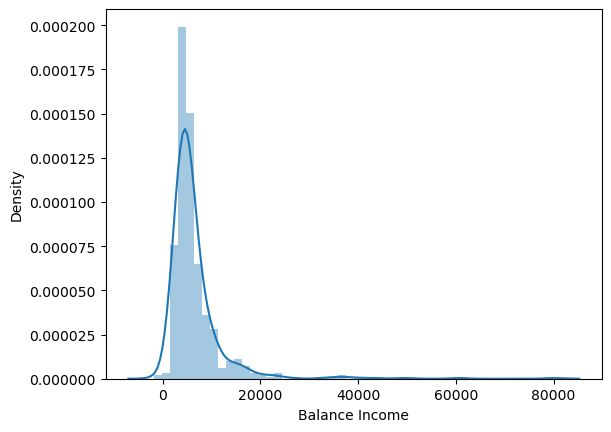

In [ ]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
# Multiply with 1000 to make the units equal
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income']);

Removing corrected features from dataset

In [ ]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
 'Loan_Amount_Term'], axis=1)

Model building

In [ ]:
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status

Decision tree

In [ ]:
from sklearn import tree

Let’s fit the decision tree model with 5 folds of cross-validation

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)


n1 of kfold 5
accuracy_score 0.7398373983739838
n2 of kfold 5
accuracy_score 0.6991869918699187
n3 of kfold 5
accuracy_score 0.7560975609756098
n4 of kfold 5
accuracy_score 0.7073170731707317
n5 of kfold 5
accuracy_score 0.6721311475409836


mean validation accuracy for this model

mean validation accuracy: 0.84453125

In [ ]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

#Random Forest Classifier

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

for train_index,test_index in kf.split(X,y):
    print('n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)

n1 of kfold 5
accuracy_score 0.8292682926829268
n2 of kfold 5
accuracy_score 0.8130081300813008
n3 of kfold 5
accuracy_score 0.7723577235772358
n4 of kfold 5
accuracy_score 0.8048780487804879
n5 of kfold 5
accuracy_score 0.7540983606557377


Mean validation accuracy: 0.8427

In [ ]:
from sklearn.model_selection import GridSearchCV

Provide range for max_depth from 1 to 20

In [ ]:
paramgrid = {'max_depth': list(range(1, 20, 2)),
                    'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
# Fit the grid search model
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None, error_score='raise',
        estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                criterion='gini', max_depth=None, max_features='auto',
                max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                oob_score=False, random_state=1, verbose=0, warm_start=False),
        n_jobs=1,
        param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
             'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
        pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
        scoring=None, verbose=0)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(max_features='auto',
                                              n_estimators=10, n_jobs=1,
                                              random_state=1),
             n_jobs=1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

# Estimating the optimized value

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=1, n_estimators=1, random_state=1)

Now let’s build the model using these optimized values

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1

pred_test = model.predict(test)
pred2 = model.predict_proba(test)[:,1]

n1 of kfold 5
accuracy_score 0.8130081300813008
n2 of kfold 5
accuracy_score 0.8455284552845529
n3 of kfold 5
accuracy_score 0.8048780487804879
n4 of kfold 5
accuracy_score 0.7967479674796748
n5 of kfold 5
accuracy_score 0.7786885245901639


 accuracy of the random forest model

In [ ]:
validation_accuracy=0.8000

In [ ]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random  Forest.csv')

Let us find the feature importance now

<Axes: >

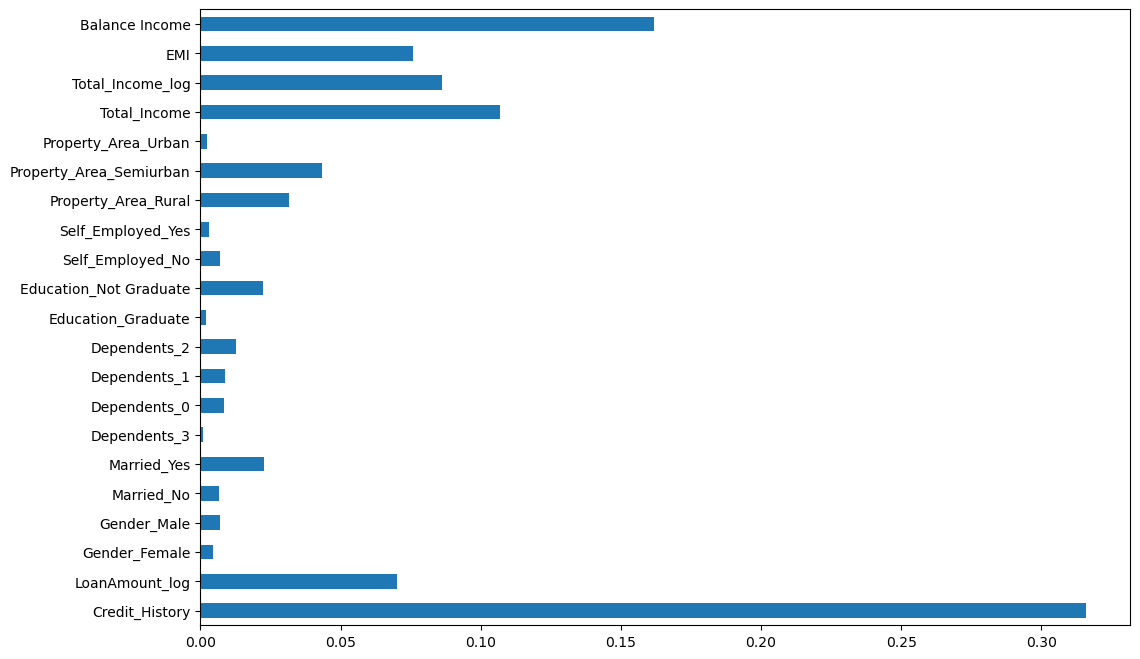

In [ ]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

XGBOOST

In [ ]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred2 = model.predict_proba(test)

n1 of kfold 5
accuracy_score 0.7723577235772358
n2 of kfold 5
accuracy_score 0.7886178861788617
n3 of kfold 5
accuracy_score 0.7723577235772358
n4 of kfold 5
accuracy_score 0.7804878048780488
n5 of kfold 5
accuracy_score 0.7704918032786885


In [ ]:
#accuracy
validation_accuracy = 0.8152

